# Tarea 01 **Polars y gráficas**

#### Informe Estadístico: Análisis de Servicios de Taxi en Enero

A continuación, se presentan los principales hallazgos y visualizaciones del análisis realizado:

 1. Promedio de ingresos brutos de cada tipo de taxi y de todos los taxis

 2. Qué tipo de taxis recorrieron la mayor cantidad de distancia en Enero

 3. Qué tipo de taxi recibe más propinas en promedio

 4. Gráfico de barras reportando el importe del peaje total de cada tipo de Taxi

 5. Un mapa de calor que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

 6. Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

In [21]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

***Promedio*** de ingresos brutos de cada tipo de taxi y de todos los taxis

In [2]:
yellow = pl.read_parquet("yellow_tripdata_2025-01.parquet")
green = pl.read_parquet("green_tripdata_2025-01.parquet")

yellow = yellow.select(pl.col("total_amount").mean().alias("Promedio taxi amarillo"))
green = green.select(pl.col("total_amount").mean().alias("Promedio taxi verde"))
total = ((yellow + green)/2)
print(yellow)
print(green)
print(total)

shape: (1, 1)
┌────────────────────────┐
│ Promedio taxi amarillo │
│ ---                    │
│ f64                    │
╞════════════════════════╡
│ 25.611292              │
└────────────────────────┘
shape: (1, 1)
┌─────────────────────┐
│ Promedio taxi verde │
│ ---                 │
│ f64                 │
╞═════════════════════╡
│ 22.634242           │
└─────────────────────┘
shape: (1, 1)
┌────────────────────────┐
│ Promedio taxi amarillo │
│ ---                    │
│ f64                    │
╞════════════════════════╡
│ 24.122767              │
└────────────────────────┘


### Qué ***tipo*** de taxis recorrieron la mayor cantidad de distancia en Enero

In [3]:
yellow = pl.read_parquet("yellow_tripdata_2025-01.parquet")
green = pl.read_parquet("green_tripdata_2025-01.parquet")

distance_summary = pl.concat([
    yellow.select(
        pl.col("trip_distance").sum().alias("distance"),
        pl.lit("amarillo").alias("taxi_type")
    ),
    green.select(
        pl.col("trip_distance").sum().alias("distance"),
        pl.lit("verde").alias("taxi_type")
    )
])

# Resultado en un solo DataFrame
print(distance_summary)

shape: (2, 2)
┌──────────┬───────────┐
│ distance ┆ taxi_type │
│ ---      ┆ ---       │
│ f64      ┆ str       │
╞══════════╪═══════════╡
│ 2.0348e7 ┆ amarillo  │
│ 1.0406e6 ┆ verde     │
└──────────┴───────────┘


### Qué tipo de taxi recibe más propinas en promedio

In [11]:
yellow = pl.read_parquet("yellow_tripdata_2025-01.parquet")
green = pl.read_parquet("green_tripdata_2025-01.parquet")

tipYellow = yellow.select(
    pl.col("tip_amount").mean().alias("Propina taxi amarillo"),
)

tipGreen = green.select(
    pl.col("tip_amount").mean().alias("Propina taxi verde"),
)

print(tipYellow)
print(tipGreen)

shape: (1, 1)
┌───────────────────────┐
│ Propina taxi amarillo │
│ ---                   │
│ f64                   │
╞═══════════════════════╡
│ 2.959813              │
└───────────────────────┘
shape: (1, 1)
┌────────────────────┐
│ Propina taxi verde │
│ ---                │
│ f64                │
╞════════════════════╡
│ 2.481859           │
└────────────────────┘


### ***Gráfico*** de barras reportando el importe del peaje total de cada tipo de Taxi

Text(0, 0.5, 'Peaje promedio')

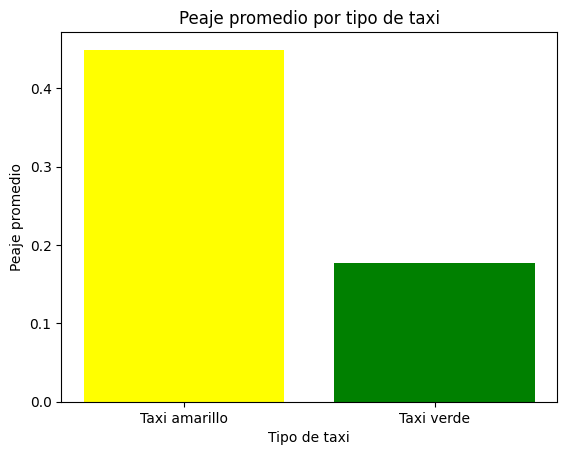

In [19]:
#tolls_amount
yellowToll = yellow.select(
    pl.col("tolls_amount").alias("Peaje taxi amarillo"),
)
tollGreen = green.select(
    pl.col("tolls_amount").alias("Peaje taxi verde"),
)

plt.bar(
    ["Taxi amarillo", "Taxi verde"],
    [yellow["tolls_amount"].mean(), green["tolls_amount"].mean()],
    color=["yellow", "green"]
)
plt.title("Peaje promedio por tipo de taxi")
plt.xlabel("Tipo de taxi")
plt.ylabel("Peaje promedio")

### Un ***mapa de calor*** que describa el comportamiento de a qué hora se tomaron todos los taxis durante los días de Enero

/tmp/ipykernel_5795/1001568486.py:13: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("trip_count")
/tmp/ipykernel_5795/1001568486.py:16: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pivot = grouped.pivot(


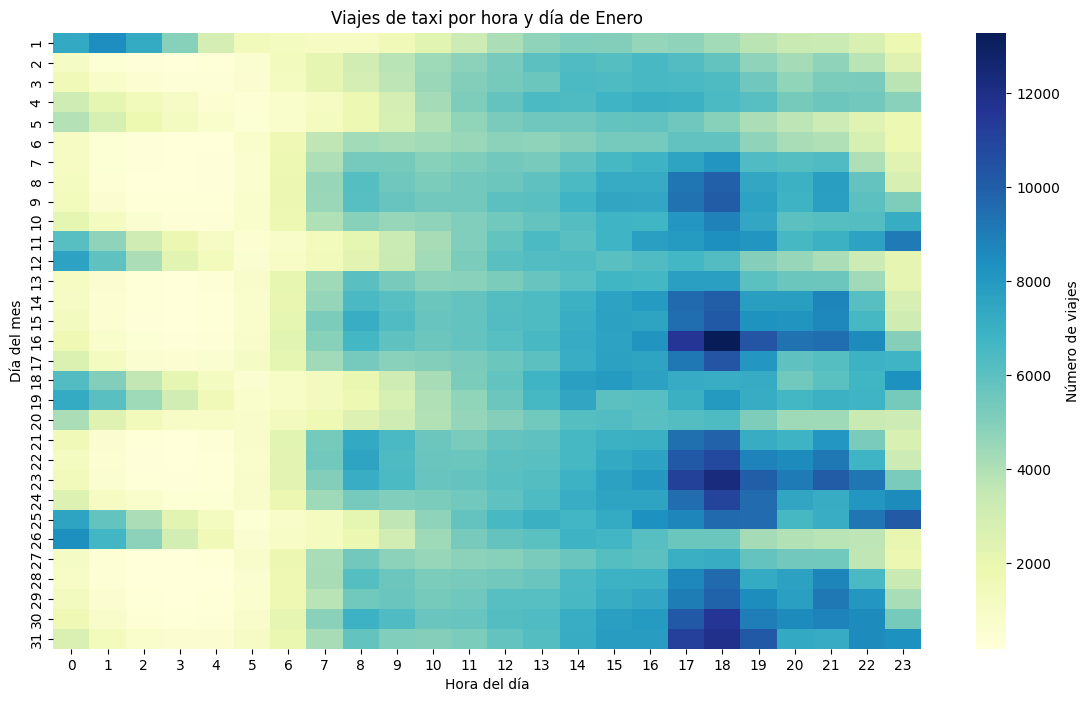

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

yellow = yellow.with_columns([
    pl.col("tpep_pickup_datetime").dt.day().alias("pickup_day"),
    pl.col("tpep_pickup_datetime").dt.hour().alias("pickup_hour"),
])


grouped = yellow.group_by(["pickup_day", "pickup_hour"]).agg(
    pl.count().alias("trip_count")
)

pivot = grouped.pivot(
    values="trip_count",
    index="pickup_day",
    columns="pickup_hour"
).sort("pickup_day")

sorted_columns = ["pickup_day"] + sorted(pivot.columns[1:], key=int)
pivot = pivot.select(sorted_columns)

heatmap_data = pivot.drop("pickup_day").to_numpy()
x_labels = pivot.columns[1:]
y_labels = pivot["pickup_day"].to_list()

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    xticklabels=x_labels,
    yticklabels=y_labels,
    cmap="YlGnBu",
    cbar_kws={'label': 'Número de viajes'}
)
plt.title("Viajes de taxi por hora y día de Enero")
plt.xlabel("Hora del día")
plt.ylabel("Día del mes")
plt.show()





### Un mapa de calor para cada tipo de taxi que reporte los días de Enero en los que más se uso su servicio

/tmp/ipykernel_5795/154643450.py:20: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  yellow_counts = yellow_jan.group_by("day").agg(pl.count().alias("count")).sort("day").fill_null(0)
/tmp/ipykernel_5795/154643450.py:21: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  green_counts = green_jan.group_by("day").agg(pl.count().alias("count")).sort("day").fill_null(0)


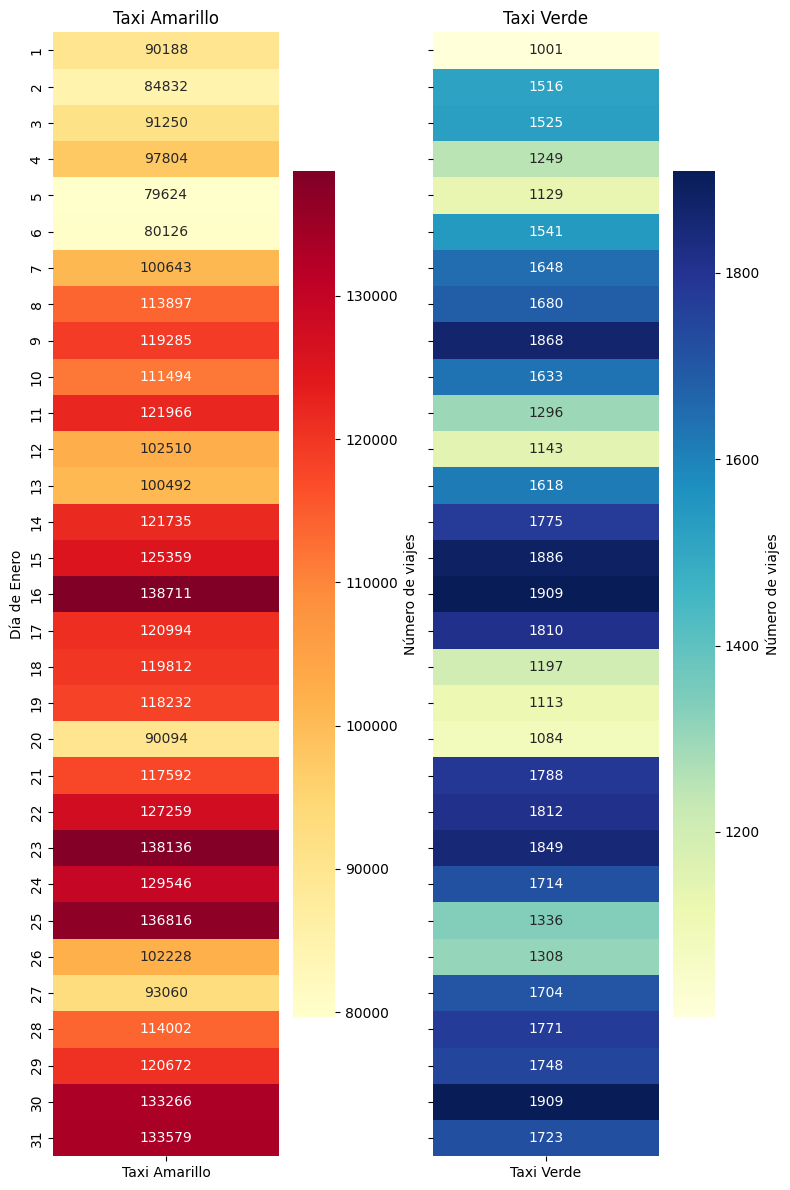

In [47]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer día y mes para ambos taxis
yellow = yellow.with_columns([
    pl.col("tpep_pickup_datetime").dt.day().alias("day"),
    pl.col("tpep_pickup_datetime").dt.month().alias("month")
])
green = green.with_columns([
    pl.col("lpep_pickup_datetime").dt.day().alias("day"),
    pl.col("lpep_pickup_datetime").dt.month().alias("month")
])

# Filtrar solo enero
yellow_jan = yellow.filter(pl.col("month") == 1)
green_jan = green.filter(pl.col("month") == 1)

# Contar viajes por día para cada taxi
yellow_counts = yellow_jan.group_by("day").agg(pl.count().alias("count")).sort("day").fill_null(0)
green_counts = green_jan.group_by("day").agg(pl.count().alias("count")).sort("day").fill_null(0)

# Convertir a numpy para heatmap
yellow_data = yellow_counts["count"].to_numpy().reshape(-1, 1)  # reshape para que sea 2D (días x 1)
green_data = green_counts["count"].to_numpy().reshape(-1, 1)

days_yellow = yellow_counts["day"].to_list()
days_green = green_counts["day"].to_list()

# Crear subplots para los dos heatmaps
fig, axes = plt.subplots(1, 2, figsize=(8, 12), sharey=True)

# Heatmap taxi amarillo
sns.heatmap(
    yellow_data,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    yticklabels=days_yellow,
    xticklabels=["Taxi Amarillo"],
    ax=axes[0],
    cbar_kws={"label": "Número de viajes"}
)
axes[0].set_ylabel("Día de Enero")
axes[0].set_xlabel("")
axes[0].set_title("Taxi Amarillo")

# Heatmap taxi verde
sns.heatmap(
    green_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    yticklabels=days_green,
    xticklabels=["Taxi Verde"],
    ax=axes[1],
    cbar_kws={"label": "Número de viajes"}
)
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("Taxi Verde")

plt.tight_layout()
plt.show()


